In [1]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [4]:
arr1 = np.ones(3)
arr1 = arr1*np.NaN
pd.Series(np.array(arr1))

0   NaN
1   NaN
2   NaN
dtype: float64

In [5]:
pd.Series()

C:\Users\abhid\AppData\Local\Temp\ipykernel_16964\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [6]:
# code here
a1 = pd.Series([1,2,3,4])
b1 = pd.Series([10,20,30,40])

print(a1+b1)
print(a1-b1)
print(a1*b1)
print(a1/b1)

0    11
1    22
2    33
3    44
dtype: int64
0    -9
1   -18
2   -27
3   -36
dtype: int64
0     10
1     40
2     90
3    160
dtype: int64
0    0.1
1    0.1
2    0.1
3    0.1
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [7]:
a2 = pd.Series([2, 4, 6, 8, 10])

b2 = pd.Series([1, 3, 5, 7, 10])

print(a2 == b2)
print(a2>b2)
print(a2<b2)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [8]:
def change_dtype(ser):
    return pd.to_numeric(ser,errors='coerce')

In [9]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
series2 = change_dtype(series)
print(series2)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [10]:
batters = pd.read_csv('batsman_runs_series.csv')
batters.head(3)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4


###`Q-6` Find top 10 most run getter from the series.

In [11]:
# code here
batters.sort_values(by='batsman_run',ascending= False)['batter'].head(10)

569           V Kohli
462          S Dhawan
130         DA Warner
430         RG Sharma
493          SK Raina
27     AB de Villiers
108          CH Gayle
339          MS Dhoni
452        RV Uthappa
256        KD Karthik
Name: batter, dtype: object

###`Q-7` No of players having runs above 3000

In [14]:
# code here
batters[batters['batsman_run']>3000]['batter'].nunique()

20

###`Q-8` No of players having runs above mean value?

In [15]:
# code here
mean_run = batters['batsman_run'].mean()
batters[batters['batsman_run']>mean_run]['batter'].nunique()

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [16]:
items = pd.read_csv('items.csv',index_col='item_name').squeeze()
items.head(5)

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
Name: item_price, dtype: object

In [17]:
items.shape

(4622,)

In [18]:
items.isnull().sum()

50

In [19]:
def convert_rupees(x):
    try:
        return float(x.split('$')[1])*82.5
    except:
        return x

In [20]:
items = items.apply(convert_rupees)

In [21]:
items.sample(10)

item_name
Chicken Burrito           905.850
Chips and Guacamole       329.175
Veggie Burrito            928.125
Chicken Burrito           928.125
Chicken Burrito           721.875
Chicken Burrito           721.875
Canned Soft Drink         103.125
Steak Burrito             969.375
Chicken Soft Tacos       1443.750
Carnitas Crispy Tacos     763.125
Name: item_price, dtype: float64

In [22]:
items.fillna(items.mean(),inplace= True)

In [23]:
items.isnull().sum()

0

###`Q-10`:
    i. Find mean price  
    ii. Find 30th and 6th percentile value  
    iii. Plot Histogram on price with bin size 50  
    iv. No of items price lies between [1000 to 2000]  



In [24]:
# code here
print('mean_price: Rs. ',items.mean())

mean_price: Rs.  615.7000984251969


In [25]:
print('30th percentile: Rs. ',np.percentile(items,30))
print('6th percentile: Rs. ',np.percentile(items,6))


30th percentile: Rs.  367.125
6th percentile: Rs.  103.125


<Axes: ylabel='Frequency'>

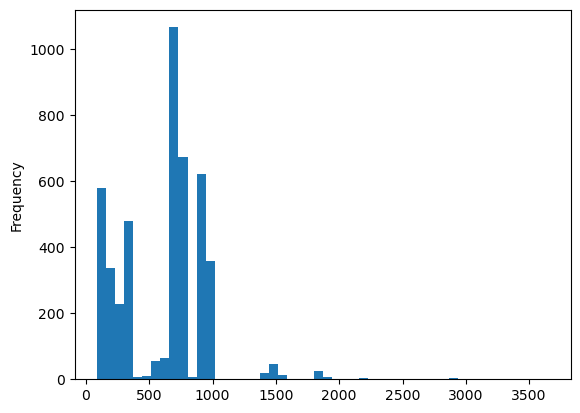

In [26]:
items.plot(kind = 'hist',bins = 50)

In [28]:
items.between(1000,2000).sum()

116